In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from cabm import post_processing as ppr

In [2]:
# Figure setup
# Set the font to Courier
mpl.rcParams['font.family'] = 'Courier'

# Set the line weight to thin
mpl.rcParams['lines.linewidth'] = 0.75

# Set the color scheme to black and white
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['axes.edgecolor'] = 'black'

In [3]:
agent_df = pd.read_pickle('agent_output_with_both_ad_affects.pkl')

In [4]:
agent_df = ppr.add_date_column(agent_df)

In [5]:
data_A = ppr.calculate_total_purchases(agent_df, ['price_A','tv_A','web_A', 'price_B', 'tv_B', 'web_B'], ['Total_Purchases_A', 'Total_Purchases_B'])

In [6]:
data_A = ppr.add_total_sales_columns(data_A, ['Total_Purchases_A', 'Total_Purchases_B'],  ['price_A','price_B'],)

In [7]:
data_A = ppr.ensure_float_columns(data_A, exclude_columns=['Date','Step'])

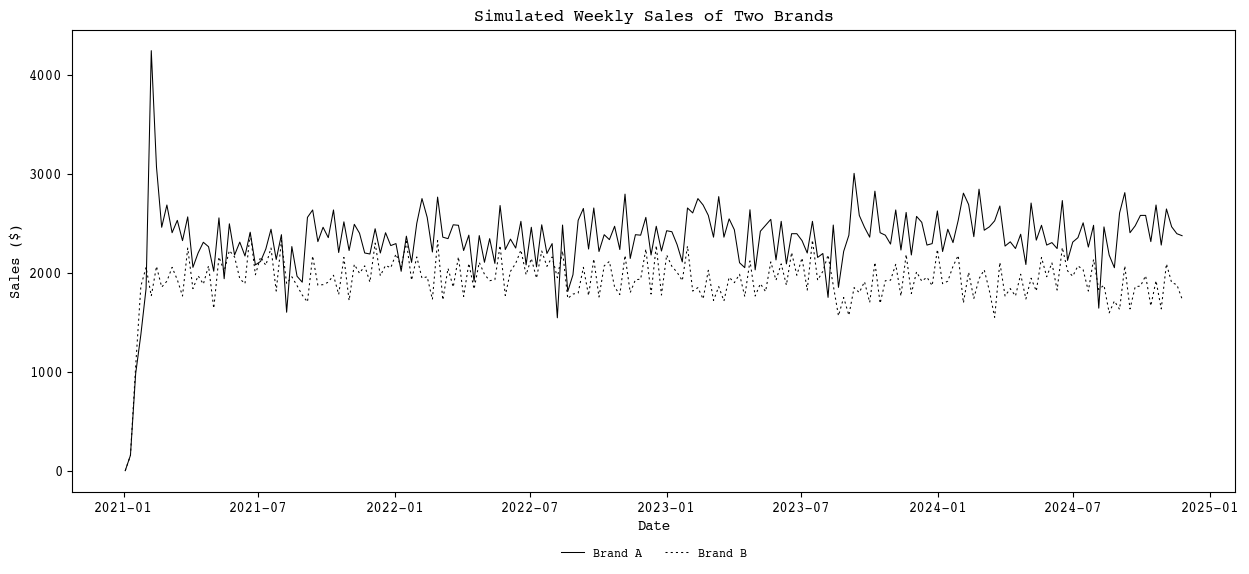

In [8]:
# Create the plot
plt.figure(figsize=(15,6))

plt.plot(data_A['Date'], data_A['Total_Sales_A'], label='Brand A', color='black')
plt.plot(data_A['Date'], data_A['Total_Sales_B'], label='Brand B', color='black', linestyle='--', dashes=[2,3])

plt.title('Simulated Weekly Sales of Two Brands')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=2, fontsize='small', frameon=False)

#plt.savefig("A_elast.png", dpi=200)
plt.show()


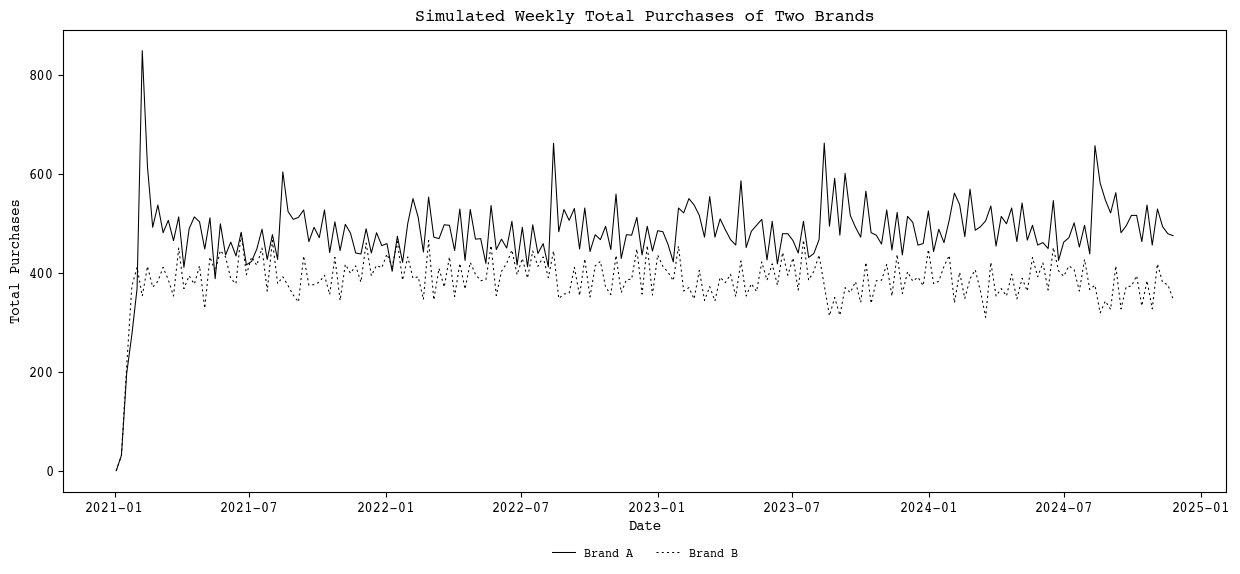

In [9]:
# Create the plot for Total_Purchases
plt.figure(figsize=(15,6))

plt.plot(data_A['Date'], data_A['Total_Purchases_A'], label='Brand A', color='black')
plt.plot(data_A['Date'], data_A['Total_Purchases_B'], label='Brand B', color='black', linestyle='--', dashes=[2,3])

plt.title('Simulated Weekly Total Purchases of Two Brands')
plt.xlabel('Date')
plt.ylabel('Total Purchases')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=2, fontsize='small', frameon=False)

#plt.savefig("Total_Purchases.png", dpi=200)
plt.show()


In [30]:
agent_df['Purchased_This_Step']

Step  AgentID
0     0          {'A': 0, 'B': 0}
      1          {'A': 0, 'B': 0}
      2          {'A': 0, 'B': 0}
      3          {'A': 0, 'B': 0}
      4          {'A': 0, 'B': 0}
                       ...       
203   137        {'A': 0, 'B': 0}
      349        {'A': 0, 'B': 0}
      578        {'A': 0, 'B': 0}
      884        {'A': 0, 'B': 0}
      591        {'A': 0, 'B': 0}
Name: Purchased_This_Step, Length: 204000, dtype: object

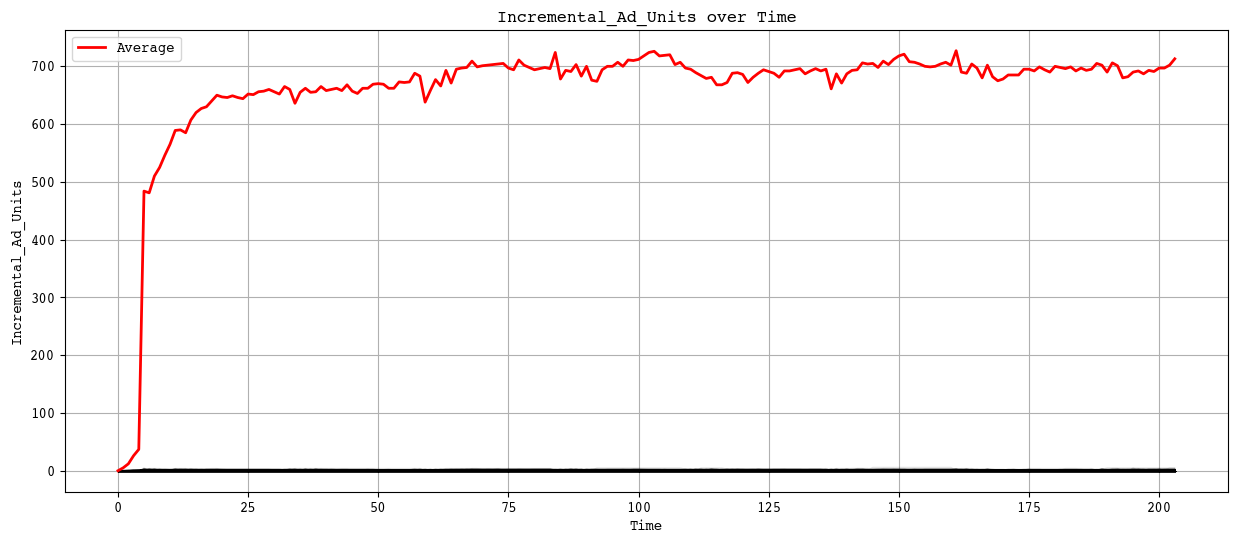

In [48]:
def plot_agent_data_over_time(agent_df, column_name):
    """
    Plots the traces of a specified column's values over time for all agents and the average value.

    Parameters:
    agent_df (pd.DataFrame): The original DataFrame with a MultiIndex of ['Step', 'AgentID'].
    column_name (str): The column name to plot.
    title (str): The title of the plot.
    ylabel (str): The label for the y-axis.
    """
    # Reset the index to make 'Step' a column
    agent_df_reset = agent_df.reset_index()

    # Pivot the DataFrame to have 'Step' as the index and 'AgentID' as columns
    pivot_df = agent_df_reset.pivot(index='Step', columns='AgentID', values=column_name)

    # Calculate the average value over all agents
    pivot_df['Average'] = pivot_df.sum(axis=1)

    # Plot the traces of all values
    plt.figure(figsize=(15, 6))

    for column in pivot_df.columns[:-1]:  # Exclude the 'Average' column
        plt.plot(pivot_df.index, pivot_df[column], color='black', alpha=0.1)  # Fine and semi-transparent lines

    # Plot the average value
    plt.plot(pivot_df.index, pivot_df['Average'], color='red', linewidth=2, label='Average')  # Bold line

    plt.title(f"{column_name} over Time")
    plt.xlabel('Time')
    plt.ylabel(f"{column_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_agent_data_over_time(agent_df, 'Incremental_Ad_Units')

In [14]:
def plot_agent_adstock(agent_df, agent_id):
    '''
    Plots adstock per brand per step for a specific agent from agent level output
    '''
    # Filter the DataFrame for the specified agent
    agent_df_filtered = agent_df.xs(agent_id, level='AgentID')

    # Initialize empty lists to store the results
    adstock_A = []
    adstock_B = []
    dates = []

    # Iterate over the 'Ad_Stock' column
    for index, row in agent_df_filtered.iterrows():
        # Append the adstock for each brand to the respective list
        adstock_A.append(row['Adstock']['A'])
        adstock_B.append(row['Adstock']['B'])
        dates.append(row['Date'])

    # Create the plot
    plt.figure(figsize=(15,6))

    plt.plot(dates, adstock_A, label='Brand A', color='black')
    plt.plot(dates, adstock_B, label='Brand B', color='black', linestyle='--', dashes=[2,3])

    plt.title(f'Adstock of Two Brands Over Time for Agent {agent_id}')
    plt.xlabel('Date')
    plt.ylabel('Adstock')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=2, fontsize='small', frameon=False)

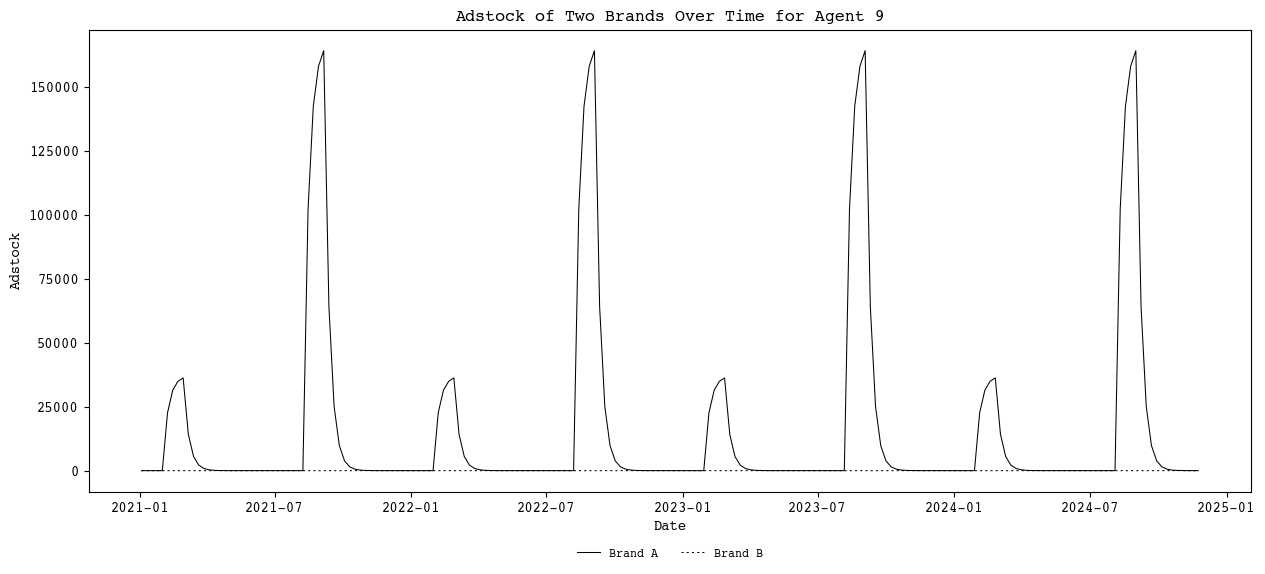

In [18]:
plot_agent_adstock(agent_df, 9)

In [19]:
def plot_agent_column(agent_df, agent_id, column_name):
    '''
    Plots a specified column per step for a specific agent from agent level output.
    This can only be applied to columns containing scale values.
    '''
    # Filter the DataFrame for the specified agent
    agent_df_filtered = agent_df.xs(agent_id, level='AgentID')

    # Check if the column exists in the DataFrame
    if column_name not in agent_df_filtered.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")

    # Extract the dates and the specified column values
    dates = agent_df_filtered['Date']
    column_values = agent_df_filtered[column_name]

    # Create the plot
    plt.figure(figsize=(15, 6))
    plt.plot(dates, column_values, label=column_name, color='blue')

    plt.title(f'{column_name} Over Time for Agent {agent_id}')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=1, fontsize='small', frameon=False)
    plt.grid(True)
    plt.show()


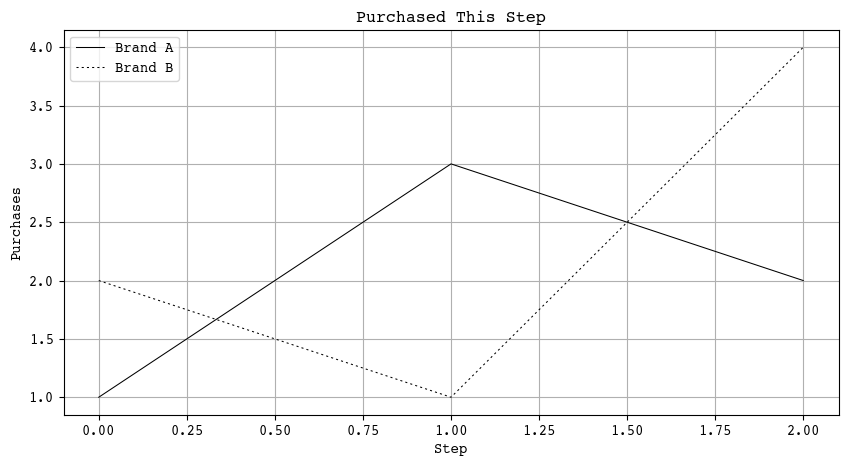

In [34]:
def plot_purchased_this_step(data_dict):
    """
    Plots the values in the provided dictionary.

    Parameters:
    data_dict (dict): A dictionary with keys 'A' and 'B' and their corresponding values.
    """
    # Extract values for each brand
    brand_A_values = [entry['A'] for entry in data_dict]
    brand_B_values = [entry['B'] for entry in data_dict]
    steps = list(range(len(data_dict)))

    # Create the plot
    plt.figure(figsize=(10, 5))
    plt.plot(steps, brand_A_values, label='Brand A', color='black')
    plt.plot(steps, brand_B_values, label='Brand B', color='black', linestyle='--', dashes=[2, 3])

    plt.title('Purchased This Step')
    plt.xlabel('Step')
    plt.ylabel('Purchases')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
example_data = [{'A': 1, 'B': 2}, {'A': 3, 'B': 1}, {'A': 2, 'B': 4}]
plot_purchased_this_step(example_data)

In [36]:
def extract_agent_purchases(agent_df, agent_id):
    """
    Extracts the 'Purchased_This_Step' data for a single agent.

    Parameters:
    agent_df (pd.DataFrame): The original DataFrame with a MultiIndex of ['Step', 'AgentID'].
    agent_id (int): The ID of the agent to extract data for.

    Returns:
    list: A list of dictionaries with keys 'A' and 'B' and their corresponding values.
    """
    # Filter the DataFrame for the specified agent
    agent_df_filtered = agent_df.xs(agent_id, level='AgentID')

    # Extract the 'Purchased_This_Step' column as a list of dictionaries
    purchases_list = agent_df_filtered['Purchased_This_Step'].tolist()

    return purchases_list

# Example usage:
agent_purchases = extract_agent_purchases(agent_df, 9)
print(agent_purchases[:50])  # Print the first 5 entries for the agent

[{'A': 0, 'B': 0}, {'A': 0, 'B': 0}, {'A': 0, 'B': 2}, {'A': 0, 'B': 1}, {'A': 0, 'B': 3}, {'A': 3, 'B': 0}, {'A': 0, 'B': 2}, {'A': 0, 'B': 2}, {'A': 0, 'B': 2}, {'A': 0, 'B': 2}, {'A': 0, 'B': 2}, {'A': 0, 'B': 2}, {'A': 0, 'B': 2}, {'A': 2, 'B': 0}, {'A': 0, 'B': 2}, {'A': 0, 'B': 2}, {'A': 2, 'B': 0}, {'A': 0, 'B': 2}, {'A': 0, 'B': 2}, {'A': 0, 'B': 2}, {'A': 0, 'B': 2}, {'A': 1, 'B': 0}, {'A': 0, 'B': 2}, {'A': 0, 'B': 2}, {'A': 0, 'B': 2}, {'A': 0, 'B': 1}, {'A': 0, 'B': 2}, {'A': 0, 'B': 4}, {'A': 0, 'B': 2}, {'A': 0, 'B': 2}, {'A': 0, 'B': 2}, {'A': 0, 'B': 1}, {'A': 3, 'B': 0}, {'A': 0, 'B': 2}, {'A': 2, 'B': 0}, {'A': 1, 'B': 0}, {'A': 0, 'B': 3}, {'A': 0, 'B': 1}, {'A': 3, 'B': 0}, {'A': 0, 'B': 2}, {'A': 0, 'B': 2}, {'A': 0, 'B': 1}, {'A': 0, 'B': 2}, {'A': 2, 'B': 0}, {'A': 0, 'B': 2}, {'A': 0, 'B': 2}, {'A': 1, 'B': 0}, {'A': 0, 'B': 2}, {'A': 0, 'B': 3}, {'A': 0, 'B': 2}]


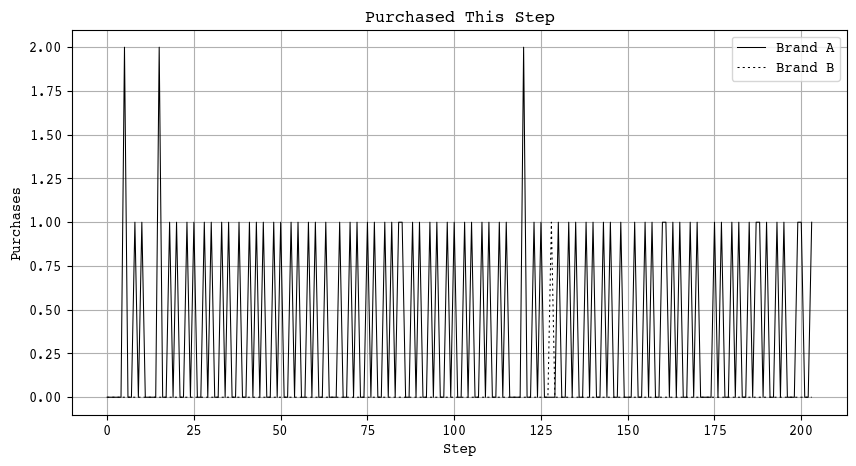

In [40]:
plot_purchased_this_step(extract_agent_purchases(agent_df,2))

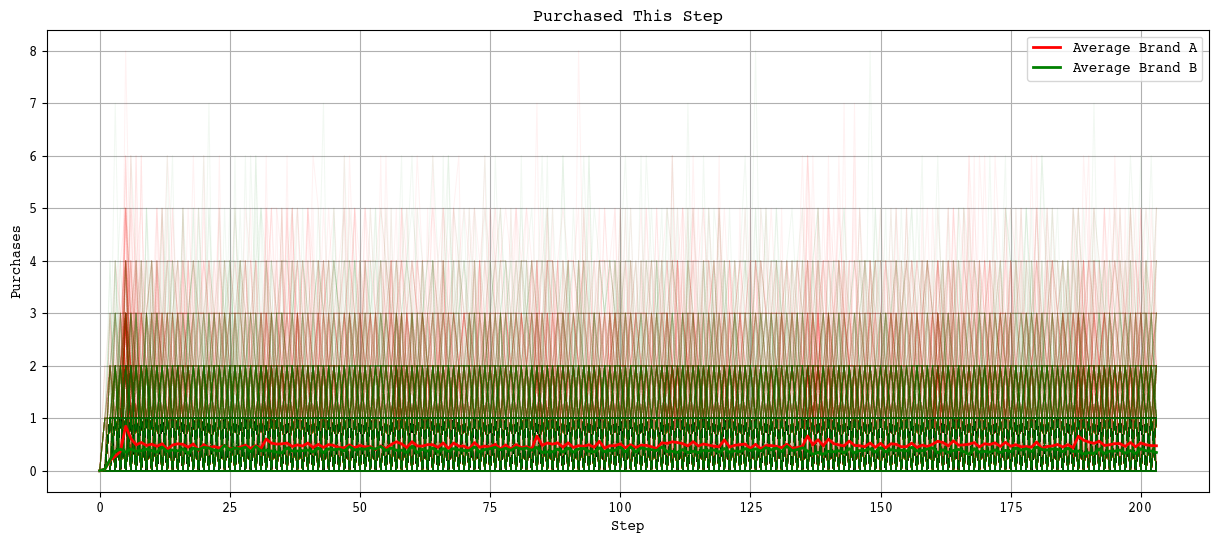

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_purchased_this_step(agent_df):
    """
    Plots the traces of purchases for all agents for each brand and the average purchases.

    Parameters:
    agent_df (pd.DataFrame): The original DataFrame with a MultiIndex of ['Step', 'AgentID'].
    """
    # Initialize lists to store purchases for each brand
    all_purchases_A = []
    all_purchases_B = []

    # Extract purchases for each agent
    for agent_id in agent_df.index.get_level_values('AgentID').unique():
        purchases = extract_agent_purchases(agent_df, agent_id)
        brand_A_values = [entry['A'] for entry in purchases]
        brand_B_values = [entry['B'] for entry in purchases]
        all_purchases_A.append(brand_A_values)
        all_purchases_B.append(brand_B_values)

    # Calculate the average purchases for each brand
    avg_purchases_A = pd.DataFrame(all_purchases_A).mean(axis=0)
    avg_purchases_B = pd.DataFrame(all_purchases_B).mean(axis=0)
    steps = list(range(len(avg_purchases_A)))

    # Create the plot
    plt.figure(figsize=(15, 6))

    # Plot individual agent traces for Brand A
    for purchases in all_purchases_A:
        plt.plot(steps, purchases, color='red', alpha=0.05)

    # Plot individual agent traces for Brand B
    for purchases in all_purchases_B:
        plt.plot(steps, purchases, color='green', alpha=0.05)

    # Plot average purchases for Brand A
    plt.plot(steps, avg_purchases_A, color='red', linewidth=2, label='Average Brand A')

    # Plot average purchases for Brand B
    plt.plot(steps, avg_purchases_B, color='green', linewidth=2, label='Average Brand B')

    plt.title('Purchased This Step')
    plt.xlabel('Step')
    plt.ylabel('Purchases')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_purchased_this_step(agent_df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


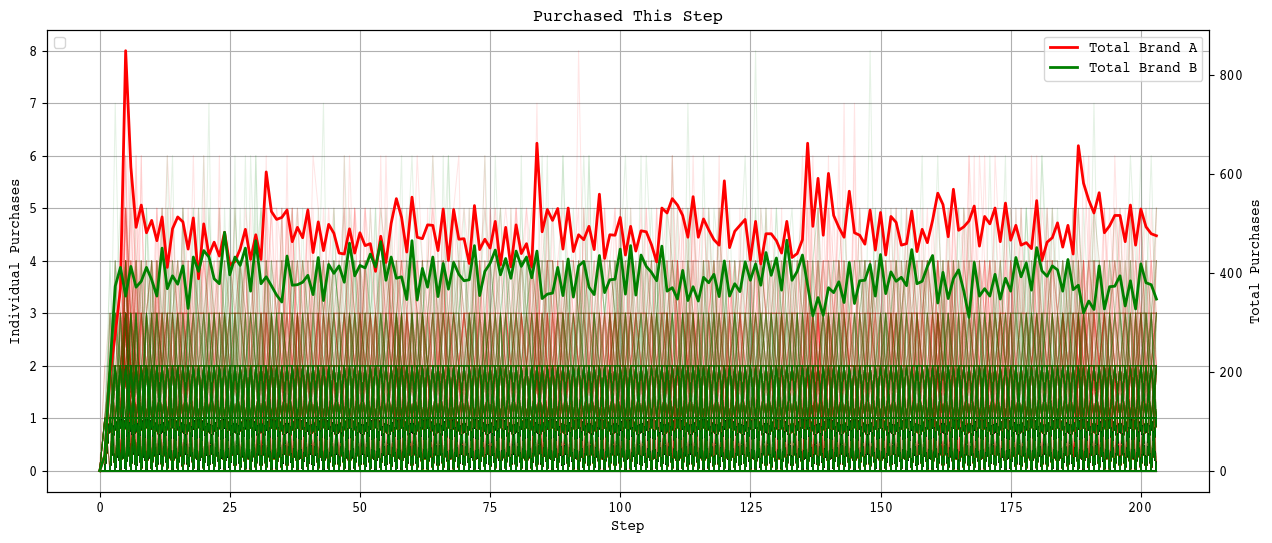

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_purchased_this_step(agent_df):
    """
    Plots the traces of purchases for all agents for each brand and the total purchases for each brand on a second y-axis.

    Parameters:
    agent_df (pd.DataFrame): The original DataFrame with a MultiIndex of ['Step', 'AgentID'].
    """
    # Initialize lists to store purchases for each brand
    all_purchases_A = []
    all_purchases_B = []

    # Extract purchases for each agent
    for agent_id in agent_df.index.get_level_values('AgentID').unique():
        purchases = extract_agent_purchases(agent_df, agent_id)
        brand_A_values = [entry['A'] for entry in purchases]
        brand_B_values = [entry['B'] for entry in purchases]
        all_purchases_A.append(brand_A_values)
        all_purchases_B.append(brand_B_values)

    # Calculate the total purchases for each brand
    total_purchases_A = pd.DataFrame(all_purchases_A).sum(axis=0)
    total_purchases_B = pd.DataFrame(all_purchases_B).sum(axis=0)
    steps = list(range(len(total_purchases_A)))

    # Create the plot
    fig, ax1 = plt.subplots(figsize=(15, 6))

    # Plot individual agent traces for Brand A
    for purchases in all_purchases_A:
        ax1.plot(steps, purchases, color='red', alpha=0.1)

    # Plot individual agent traces for Brand B
    for purchases in all_purchases_B:
        ax1.plot(steps, purchases, color='green', alpha=0.1)

    ax1.set_xlabel('Step')
    ax1.set_ylabel('Individual Purchases')
    ax1.grid(True)

    # Create a second y-axis for the total purchases
    ax2 = ax1.twinx()
    ax2.plot(steps, total_purchases_A, color='red', linewidth=2, label='Total Brand A')
    ax2.plot(steps, total_purchases_B, color='green', linewidth=2, label='Total Brand B')
    ax2.set_ylabel('Total Purchases')

    # Add legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.title('Purchased This Step')
    plt.show()

# Example usage:
plot_purchased_this_step(agent_df)

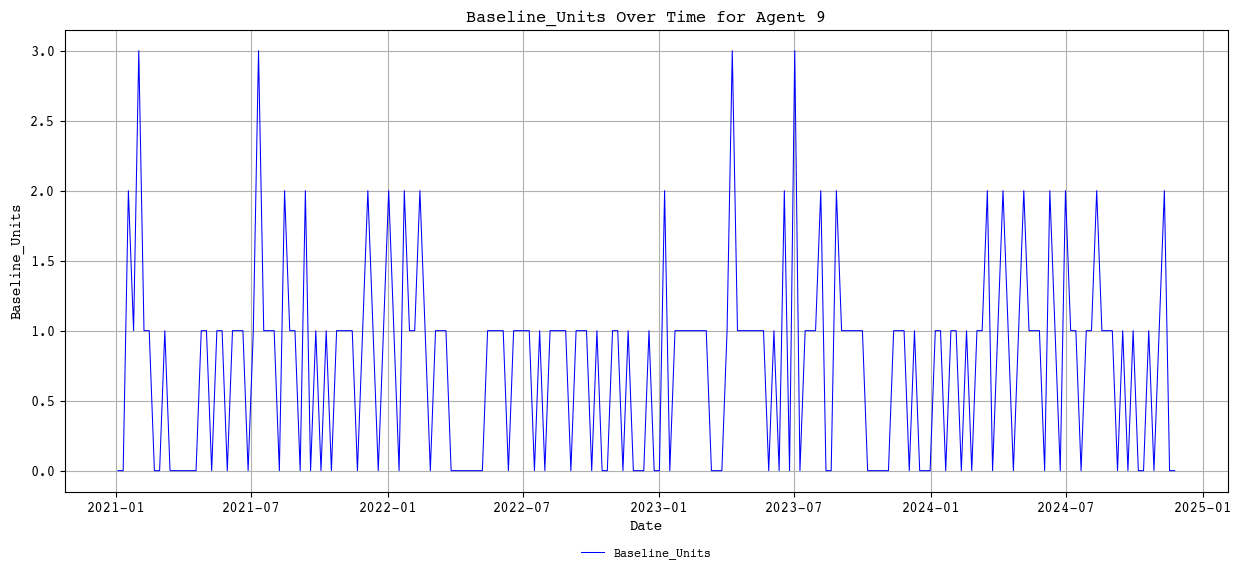

In [20]:
plot_agent_column(agent_df,9,'Baseline_Units')

In [21]:

def get_pretty_agent_attributes(agent_df, agent_id):
    """
    Returns a pretty printed dictionary of static agent attributes.

    Parameters:
    - agent_df: DataFrame containing agent data.
    - agent_id: The ID of the agent to extract attributes for.

    Returns:
    - A dictionary with key-value pairs for the specified columns.
    """
    # Define the columns to extract
    columns = [
        'Household_Size', 'Consumption_Rate', 'Brand_Preference', 
        'Loyalty_Rate', 'Ad_Decay_Factor', 'Pantry_Min', 'Pantry_Max'
    ]
    
    # Filter the DataFrame for the specified agent
    agent_df_filtered = agent_df.xs(agent_id, level='AgentID')
    
    # Construct the dictionary with the specified columns
    attributes = {col: agent_df_filtered[col].iloc[0] for col in columns}
    
    # # Pretty print the dictionary
    # pprint.pprint(attributes)
    
    return attributes



In [22]:
get_pretty_agent_attributes(agent_df, 9)

{'Household_Size': 5,
 'Consumption_Rate': 2.4750646759003088,
 'Brand_Preference': 'B',
 'Loyalty_Rate': 0.8948669200034542,
 'Ad_Decay_Factor': 2.5587132048474235,
 'Pantry_Min': 0.5,
 'Pantry_Max': 4}